In [1]:
import numpy as np
import pandas as pd
import copy as cp
from tqdm import tqdm_notebook
import time 
import matplotlib.pyplot as pt

In [23]:
#Dummy Data to try running code
# Data = [[1],[2],[3,4],[1,2],[1,2],[1,2],[1,2,3,4,5],[1],[2],[3,5]]
# setData = list(map(set, Data))
# dataSize = len(setData)
# ItemSet1 = list(map(frozenset,[[1],[2],[3],[4],[5]]))

In [2]:
def readFile(fileName):
    data = pd.read_csv(fileName,sep = ' ',header=None).iloc[:,:-1]
    colNo = np.max(data.count(axis = 1))
    dataSize = len(data)
    return data,colNo,dataSize

In [3]:
def find1ItemSet(data):
    actualItemList = np.unique(data)
    listofItem = [[i] for i in actualItemList]
    return list(map(frozenset,listofItem))

In [4]:
def calSupportAndPrune(setData,ItemSet,minSupportCount,dataSize):
    ItemSetDic = {}
    for transaction in tqdm_notebook(setData):
        for Item in ItemSet:
            if(Item.issubset(transaction)):
                if Item not in ItemSetDic : 
                    ItemSetDic[Item] = 1
                else:
                    ItemSetDic[Item] += 1 
    ItemSetAndSupport = {}
    for ItemKey in ItemSetDic:
        support = ItemSetDic[ItemKey]/dataSize
        if(support >= minSupportCount):
            ItemSetAndSupport[ItemKey] = support    
    ItemSetAndSupport = dict(sorted(ItemSetAndSupport.items(),key = lambda x: x[1],reverse = True))
    FItemSet = list(ItemSetAndSupport.keys())
    return FItemSet,ItemSetAndSupport

In [5]:
def calHconfAndprune(ItemSet,supportDataOf1,supportData_k,hc):
    itemSetWithLessHconf = []
    for i in ItemSet:
        #cal the element with maximumHconf
        itemList = [frozenset([j]) for j in list(i)]
        maxSingleHconf = max([supportDataOf1[k] for k in itemList])
        ItemSetHconf = supportData_k[i]/maxSingleHconf
        if(ItemSetHconf < hc):
            itemSetWithLessHconf.append(i)
    fItemSet = [i for i in ItemSet if i not in itemSetWithLessHconf]
    return fItemSet 

In [6]:
def candidateGeneration(ItemSetk_1,SupportItemSet1,hc):
    ItemSetK = []
    for i in range(len(ItemSetk_1)):
        y = ItemSetk_1[i]
        for j in range(i+1,len(ItemSetk_1)):
            x = ItemSetk_1[j]
            #if(SupportItemSet1[x] < SupportItemSet1[y] * hc):
            #    break;
            L1 = list(y);
            L2 = list(x);
            if L1[:-1] == L2[:-1]:
                ItemSetK.append(x | y)
    return ItemSetK;

In [7]:
def candidateGenerationCrossSupport(ItemSetk_1,SupportItemSet1,hc):
    ItemSetK = []
    for i in range(len(ItemSetk_1)):
        y = ItemSetk_1[i]
        for j in range(i+1,len(ItemSetk_1)):
            x = ItemSetk_1[j]
            if(SupportItemSet1[x] < SupportItemSet1[y] * hc):
                break;
            L1 = list(y);
            L2 = list(x);
            if L1[:-1] == L2[:-1]:
                ItemSetK.append(x | y)
    return ItemSetK;

In [8]:
t1= time.time()
fileName = 'pumsb.dat'
data,colNo,dataSize = readFile(fileName)
setData = list(map(set, data.to_numpy()))
ItemSet1 = find1ItemSet(data)
print("Length of 1 itemSet",len(ItemSet1))
print(time.time() - t1)

Length of 1 itemSet 2113
2.9688029289245605


In [9]:
samplesize = [.2,.4,.6,.8,1]
dictTime = {}

In [10]:
#for sample in samplesize:
    #time1 = time.time();
    #data = dataMain.sample(frac=sample, replace=True, random_state=1)
    #dataSize = len(data)
    #setData = list(map(set, data.to_numpy()))
    #ItemSet1 = find1ItemSet(data)
    #print("Length of 1 itemSet",len(ItemSet1))
minSupportList = [0.5]
hcList = [.95]
timeExecuted ={}
patternfound ={}
for hc in hcList:
    tmexe = []
    patternfnx = []
    for minSupport in minSupportList: 
        t1= time.time()
        FItemSet1 , SupportItemSet1 = calSupportAndPrune(setData,ItemSet1,minSupport,dataSize)
        print (len(FItemSet1))
        #print(time.time() - t1)
        #t1= time.time()
        ItemSetk = cp.deepcopy(FItemSet1)
        totalItemCount = len(ItemSetk)
        SupportItemSetk = cp.deepcopy(SupportItemSet1)
        print("1 ItemSet are:\n",ItemSetk)
        for i in tqdm_notebook(range(2,len(ItemSetk))):
            CItemSetk = candidateGeneration(ItemSetk , SupportItemSetk, minSupport)
            ItemSetk , SupportItemSetk = calSupportAndPrune(setData,CItemSetk,minSupport,dataSize)
            ItemSetk = calHconfAndprune(ItemSetk,SupportItemSet1,SupportItemSetk,hc)
            if(len(ItemSetk) ==0 ):
                break;
            print("Length of ",i ," ItemSet is:\n",len(ItemSetk))
            print("Itemset set of",i,"Lenght\n",ItemSetk)
            totalItemCount += len(ItemSetk)
        #print(time.time() - t1)
        #print ("Total number of item generated are",totalItemCount)
        tmexe.append(time.time() - t1);
        patternfnx.append(totalItemCount) 
    timeExecuted[hc] = tmexe
    patternfound[hc] = patternfnx
#dictTime[dataSize] = time.time() - time1
        


52
1 ItemSet are:
 [frozenset({4438}), frozenset({7062}), frozenset({170}), frozenset({180}), frozenset({184}), frozenset({4428}), frozenset({4434}), frozenset({4426}), frozenset({4432}), frozenset({4940}), frozenset({7092}), frozenset({4436}), frozenset({188}), frozenset({4430}), frozenset({7112}), frozenset({7102}), frozenset({260}), frozenset({265}), frozenset({3404}), frozenset({4404}), frozenset({17}), frozenset({7082}), frozenset({4414}), frozenset({4440}), frozenset({3403}), frozenset({7072}), frozenset({161}), frozenset({197}), frozenset({4502}), frozenset({84}), frozenset({4499}), frozenset({168}), frozenset({4933}), frozenset({4937}), frozenset({4496}), frozenset({277}), frozenset({4493}), frozenset({4503}), frozenset({4798}), frozenset({4413}), frozenset({2297}), frozenset({7057}), frozenset({4807}), frozenset({4833}), frozenset({6867}), frozenset({4527}), frozenset({4627}), frozenset({4727}), frozenset({4785}), frozenset({2301}), frozenset({2401}), frozenset({15})]


Length of  2  ItemSet is:
 117
Itemset set of 2 Lenght
 [frozenset({4438, 7062}), frozenset({170, 4438}), frozenset({184, 180}), frozenset({180, 4438}), frozenset({184, 4438}), frozenset({170, 7062}), frozenset({4428, 4438}), frozenset({170, 180}), frozenset({184, 170}), frozenset({180, 7062}), frozenset({184, 7062}), frozenset({4428, 7062}), frozenset({4434, 4438}), frozenset({170, 4428}), frozenset({4426, 4438}), frozenset({4432, 4438}), frozenset({4940, 4438}), frozenset({4434, 7062}), frozenset({7092, 4438}), frozenset({180, 4428}), frozenset({184, 4428}), frozenset({170, 4434}), frozenset({4432, 7062}), frozenset({4426, 7062}), frozenset({4426, 4428}), frozenset({170, 4426}), frozenset({4432, 170}), frozenset({4940, 7062}), frozenset({170, 4940}), frozenset({7092, 7062}), frozenset({4434, 180}), frozenset({184, 4434}), frozenset({170, 7092}), frozenset({4434, 4428}), frozenset({4432, 4428}), frozenset({4426, 180}), frozenset({184, 4426}), frozenset({4436, 4438}), frozenset({4432, 

Length of  3  ItemSet is:
 140
Itemset set of 3 Lenght
 [frozenset({184, 180, 4438}), frozenset({4438, 170, 7062}), frozenset({184, 170, 180}), frozenset({184, 180, 7062}), frozenset({170, 180, 4438}), frozenset({184, 170, 4438}), frozenset({4438, 180, 7062}), frozenset({184, 4438, 7062}), frozenset({4438, 4428, 7062}), frozenset({170, 4428, 4438}), frozenset({170, 180, 7062}), frozenset({184, 170, 7062}), frozenset({184, 180, 4428}), frozenset({4438, 4434, 7062}), frozenset({170, 4428, 7062}), frozenset({170, 4434, 4438}), frozenset({180, 4428, 4438}), frozenset({184, 4428, 4438}), frozenset({4432, 4438, 7062}), frozenset({4438, 4426, 7062}), frozenset({4426, 4428, 4438}), frozenset({170, 4426, 4438}), frozenset({4432, 170, 4438}), frozenset({4438, 4940, 7062}), frozenset({170, 4940, 4438}), frozenset({184, 4434, 180}), frozenset({170, 180, 4428}), frozenset({184, 170, 4428}), frozenset({4438, 7092, 7062}), frozenset({170, 4434, 7062}), frozenset({180, 4428, 7062}), frozenset({184, 44

Length of  4  ItemSet is:
 80
Itemset set of 4 Lenght
 [frozenset({180, 4438, 184, 170}), frozenset({180, 7062, 4438, 184}), frozenset({180, 7062, 184, 170}), frozenset({180, 7062, 4438, 170}), frozenset({7062, 4438, 184, 170}), frozenset({180, 4438, 184, 4428}), frozenset({7062, 4438, 170, 4428}), frozenset({180, 184, 170, 4428}), frozenset({180, 7062, 184, 4428}), frozenset({4434, 180, 4438, 184}), frozenset({180, 4438, 170, 4428}), frozenset({4438, 184, 170, 4428}), frozenset({4434, 7062, 4438, 170}), frozenset({180, 7062, 4438, 4428}), frozenset({7062, 4438, 184, 4428}), frozenset({180, 4438, 184, 4426}), frozenset({4432, 180, 4438, 184}), frozenset({7062, 4438, 4426, 4428}), frozenset({4432, 7062, 4438, 170}), frozenset({7062, 4438, 170, 4426}), frozenset({180, 4438, 184, 4940}), frozenset({4438, 170, 4428, 4426}), frozenset({4434, 180, 184, 170}), frozenset({180, 7092, 4438, 184}), frozenset({4434, 180, 7062, 184}), frozenset({7062, 4438, 170, 4940}), frozenset({180, 7062, 170, 4

Length of  5  ItemSet is:
 21
Itemset set of 5 Lenght
 [frozenset({170, 180, 4438, 7062, 184}), frozenset({170, 4428, 180, 4438, 184}), frozenset({4428, 180, 4438, 7062, 184}), frozenset({170, 4428, 180, 7062, 184}), frozenset({170, 4434, 180, 4438, 184}), frozenset({4434, 180, 4438, 7062, 184}), frozenset({170, 4428, 180, 4438, 7062}), frozenset({170, 4428, 4438, 7062, 184}), frozenset({4426, 170, 180, 4438, 184}), frozenset({170, 4432, 180, 4438, 184}), frozenset({4432, 180, 4438, 7062, 184}), frozenset({170, 4434, 180, 7062, 184}), frozenset({4426, 170, 180, 7062, 184}), frozenset({170, 4432, 180, 7062, 184}), frozenset({170, 4426, 4428, 180, 184}), frozenset({4833, 4807, 4527, 4627, 4727}), frozenset({4833, 4807, 4527, 4785, 4727}), frozenset({4833, 4807, 4527, 4785, 4627}), frozenset({4833, 4807, 4785, 4627, 4727}), frozenset({4807, 4527, 4785, 4627, 4727}), frozenset({4833, 4527, 4785, 4627, 4727})]


Length of  6  ItemSet is:
 2
Itemset set of 6 Lenght
 [frozenset({170, 4428, 180, 4438, 7062, 184}), frozenset({4833, 4807, 4527, 4785, 4627, 4727})]


In [33]:
timewithCross = timeExecuted
timewithCross

{0.92: [164.50203824043274],
 0.94: [93.56746125221252],
 0.96: [61.80487036705017],
 0.98: [57.03518486022949]}

In [35]:
timewithoutCross = timeExecuted
timewithoutCross

{0.92: [173.15944743156433],
 0.94: [105.50416874885559],
 0.96: [65.59852576255798],
 0.98: [54.475138425827026]}

In [36]:
keys = timewithCross.keys()
timevaluesC = timewithCross.values()
timeC = [i[0] for i in timevaluesC]
timevalues = timewithoutCross.values()
time = [i[0] for i in timevalues]


Text(0, 0.5, 'Execution Time')

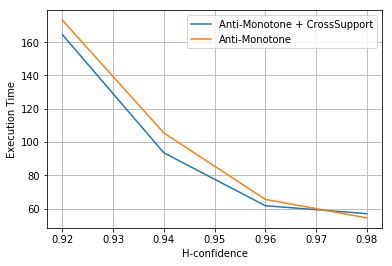

In [37]:
axes = pt.gca()
pt.plot(keys,timeC,label = 'Anti-Monotone + CrossSupport')
pt.plot(keys,time,label = 'Anti-Monotone')
pt.legend()
pt.grid(True)
pt.xlabel('H-confidence')
pt.ylabel('Execution Time')

# Output

In [15]:
for hc in hcList:
    print("For Hconficence value  of ", hc)
    print ("No of Pattern \t Execution time")
    for i in range(len(minSupportList)):
        print (patternfound[hc][i] ,"\t\t", timeExecuted[hc][i])
    print ("\n")

For Hconficence value  of  0.95
No of Pattern 	 Execution time
435 		 91.46761417388916




In [62]:
def plotLossFunction(x , y, z,hc):
    pt.ion()
    fig, (ax1, ax2) = pt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    #axes = pt.gca()
    #axes.set_xlim([xmin,xmax])
    #axes.set_ylim([0,10000])
    ax1.plot(x,y[hc[0]],label = 'hconf'+ str(hc[0]))
    ax1.plot(x,y[hc[1]],label = 'hconf'+ str(hc[1]))
    ax1.set_title('Confidence-Pruning Effect')
    ax1.legend()
    ax1.grid()
    ax1.set_xlabel('Minimum Support Thresholds')
    ax1.set_ylabel('Number of Hyperclique Patterns')
    
    #axes.set_ylim([0,max(z[hc[1]])])
    ax2.plot(x,z[hc[0]], label = 'hconf = '+ str(hc[0]))
    ax2.plot(x,z[hc[1]], label = 'hconf = '+ str(hc[1]))
    ax2.legend()
    ax2.grid()
    ax2.set_title('Time Taken')
    ax2.set_xlabel('Minimum Support Thresholds')
    ax2.set_ylabel('Execution Time (sec)')
    ax2.yaxis.tick_right()
    pt.show()

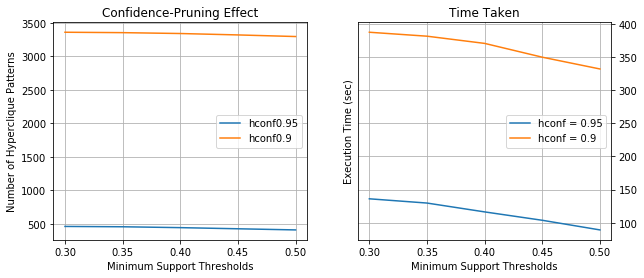

In [63]:
plotLossFunction(minSupportList,patternfound,timeExecuted,hcList)

In [60]:
def plotSingle(x,y,hc):
    axes = pt.gca()
    #axes.set_xlim([xmin,xmax])
    axes.set_ylim([0,3500])
    pt.plot(x,y[hc[0]],label = 'hconf'+ str(hc[0]))
    pt.plot(x,y[hc[1]],label = 'hconf'+ str(hc[1]))
    #pt.set_title('Confidence-Pruning Effect')
    pt.legend()
    pt.grid(True)
    pt.xlabel('Minimum Support Thresholds')
    pt.ylabel('Number of Hyperclique Patterns')

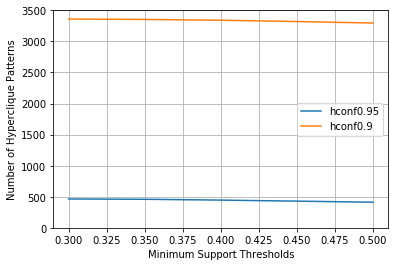

In [61]:
plotSingle(minSupportList,patternfound,hcList)

Text(0, 0.5, 'Execution Time')

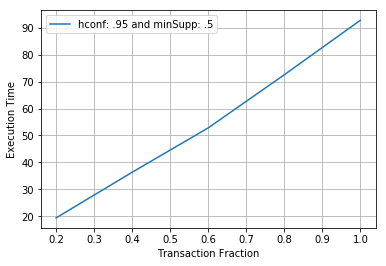

In [21]:
axes = pt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([0,3500])
pt.plot(samplesize,list(dictTime.values()),label = 'hconf: .95 and minSupp: .5')
pt.legend()
pt.grid(True)
pt.xlabel('Transaction Fraction')
pt.ylabel('Execution Time')